## Import the packages and Load the Data

In [12]:
import pandas as pd
import seaborn as sns

In [16]:
# Data Link: https://www.kaggle.com/code/whyalwaysme/ab-nyc-2019
df=pd.read_csv("../csv/ab_nyc_2019.csv")

In [17]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df["id"]=df["id"].astype(str)
df["host_id"]=df["host_id"].astype(str)
df["latitude"]=df["latitude"].astype(str)
df["longitude"]=df["longitude"].astype(str)



In [6]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.nunique()

id                                38821
name                              38253
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## Categorical

In [10]:
df["neighbourhood_group"].value_counts(normalize=True)

neighbourhood_group
Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: proportion, dtype: float64

In [12]:
df["room_type"].value_counts()

room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: count, dtype: int64

In [13]:
df["room_type"].value_counts(normalize=True)

room_type
Entire home/apt    0.523454
Private room       0.454754
Shared room        0.021792
Name: proportion, dtype: float64

In [14]:
df.nunique()

id                                38821
name                              38253
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [16]:
df["neighbourhood"].value_counts().reset_index()

,neighbourhood,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Olinville,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


## Numerical

In [17]:
df["price"].value_counts(bins=5)

(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: count, dtype: int64

In [18]:
df["price"].mean()

np.float64(142.33252621004095)

In [19]:
df["price"].skew()

np.float64(23.673594295123014)

In [20]:
df["price"].kurt()

np.float64(953.4807356344944)

In [21]:
df.corr()

ValueError: could not convert string to float: 'Clean & quiet apt home by the park'

## Bar Graph

<Axes: xlabel='neighbourhood_group', ylabel='count'>

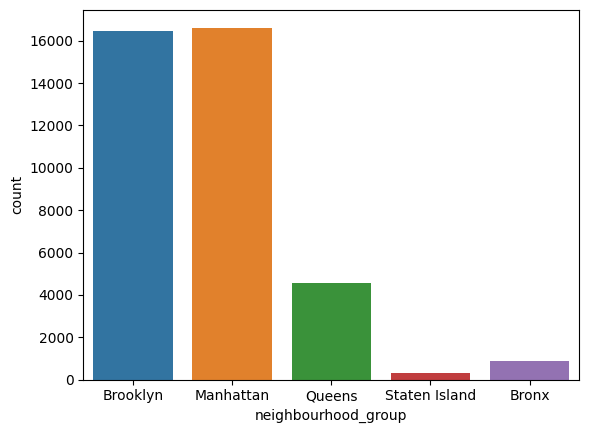

In [30]:
sns.countplot(df, x="neighbourhood_group", hue="neighbourhood_group")

<Axes: xlabel='room_type', ylabel='count'>

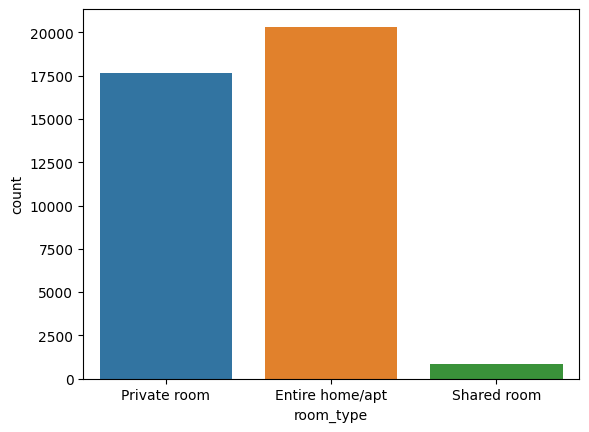

In [31]:
sns.countplot(df, x="room_type", hue="room_type")

<Axes: xlabel='neighbourhood_group', ylabel='count'>

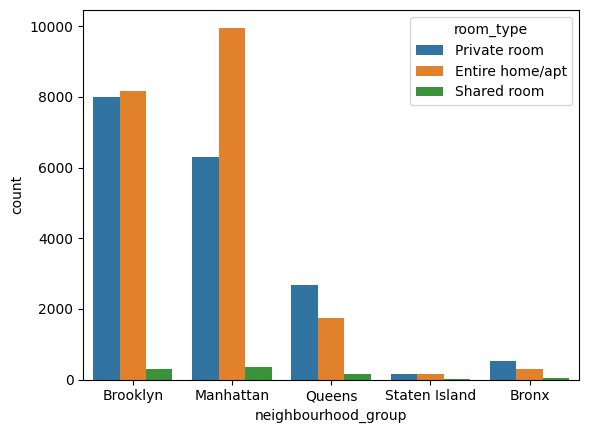

In [32]:
sns.countplot(df, x="neighbourhood_group", hue="room_type")

## Pie Chart

<Axes: ylabel='count'>

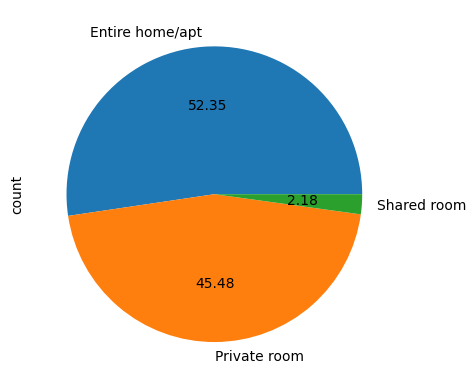

In [35]:
df["room_type"].value_counts().plot(kind="pie", autopct="%0.2f")

<Axes: xlabel='room_type'>

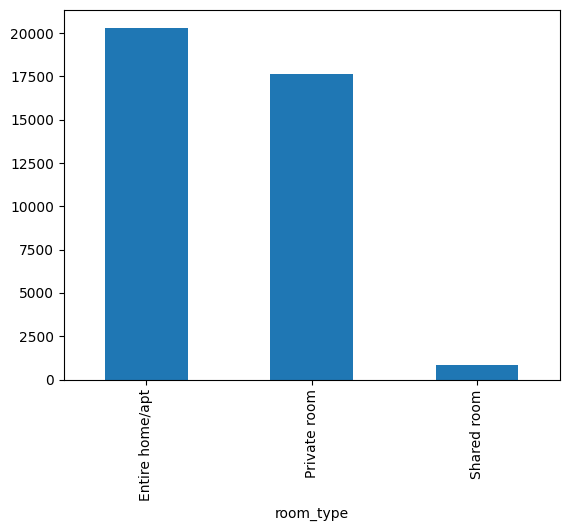

In [36]:
df["room_type"].value_counts().plot(kind="bar")

## Histogram

<Axes: xlabel='price', ylabel='Count'>

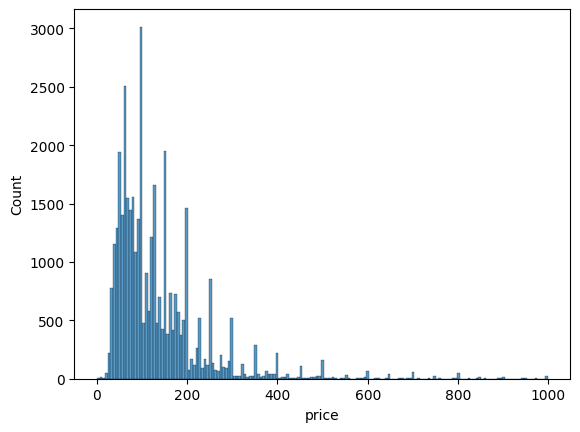

In [39]:
sns.histplot(data=df[df["price"]<1000], x="price")

<Axes: xlabel='availability_365', ylabel='Count'>

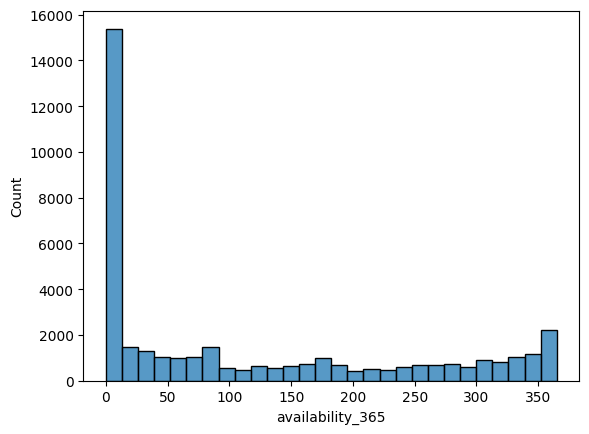

In [40]:
sns.histplot(data=df[df["price"]<1000], x="availability_365")

/tmp/ipykernel_98581/1603039620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["availability_365"])


<Axes: xlabel='availability_365', ylabel='Density'>

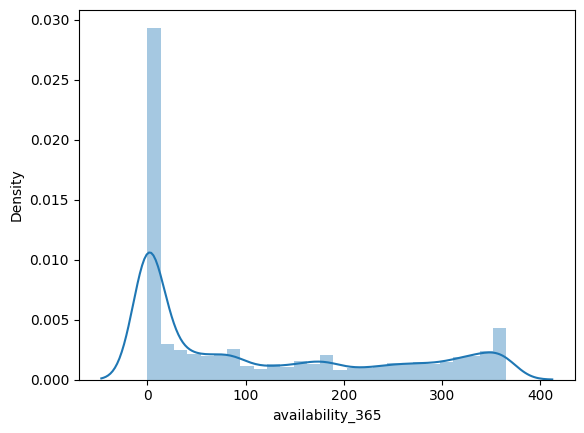

In [43]:
sns.distplot(df["availability_365"])

## BoxPlot

<Axes: ylabel='price'>

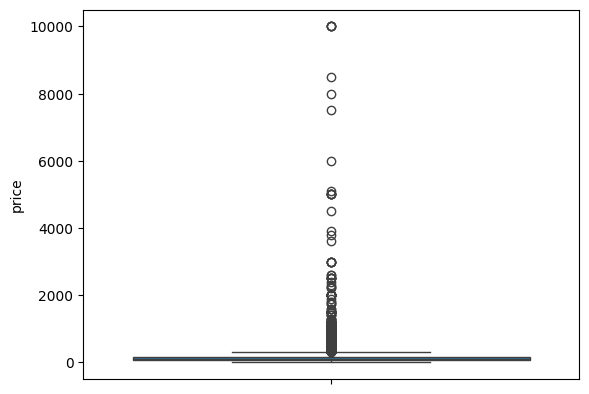

In [46]:
sns.boxplot(df["price"])

# Bi Variate Analysis

In [49]:
sns.barplot(x="class", y="age", data=df)

ValueError: Could not interpret value `class` for `x`. An entry with this name does not appear in `data`.